# Linear SVM with Sklearn

### Load the iris dataset

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

### Split the data into training and test sets

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
x_train.shape, x_test.shape

((120, 2), (30, 2))

### Linear SVM

In [9]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train, y_train)

/home/joao-correia/anaconda3/envs/ML_ADS/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/joao-correia/anaconda3/envs/ML_ADS/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

### Make predictions on the test set

In [15]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2,
       2, 2, 0, 2, 2, 1, 0, 1])

### Evaluate the model

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7666666666666667

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.67      0.44      0.53         9
           2       0.62      0.89      0.73         9

    accuracy                           0.77        30
   macro avg       0.76      0.75      0.74        30
weighted avg       0.78      0.77      0.76        30



In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
scores.mean(), scores.std()

/home/joao-correia/anaconda3/envs/ML_ADS/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/joao-correia/anaconda3/envs/ML_ADS/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/joao-correia/anaconda3/envs/ML_ADS/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/joao-correia/anaconda3/envs/ML_ADS/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/joao-correia/anaconda3/envs/ML_ADS/lib/python3.10/site-packages/sklearn/

(0.7733333333333332, 0.06798692684790383)

# Display the decision boundary

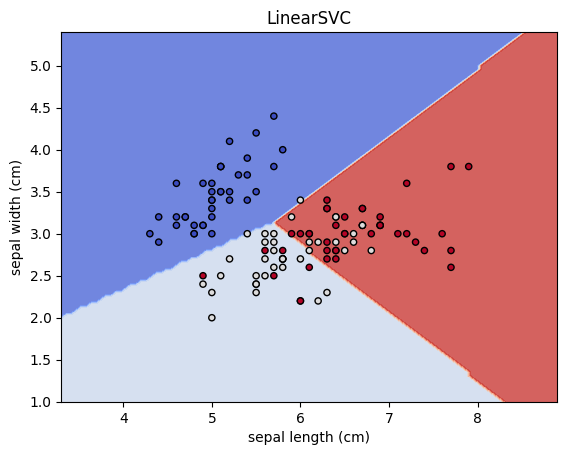

In [20]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

X0, X1 = x_train[:, 0], x_train[:, 1]

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    x_train,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    )
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.title("LinearSVC")

plt.show()


# Plot the support vectors in LinearSVC

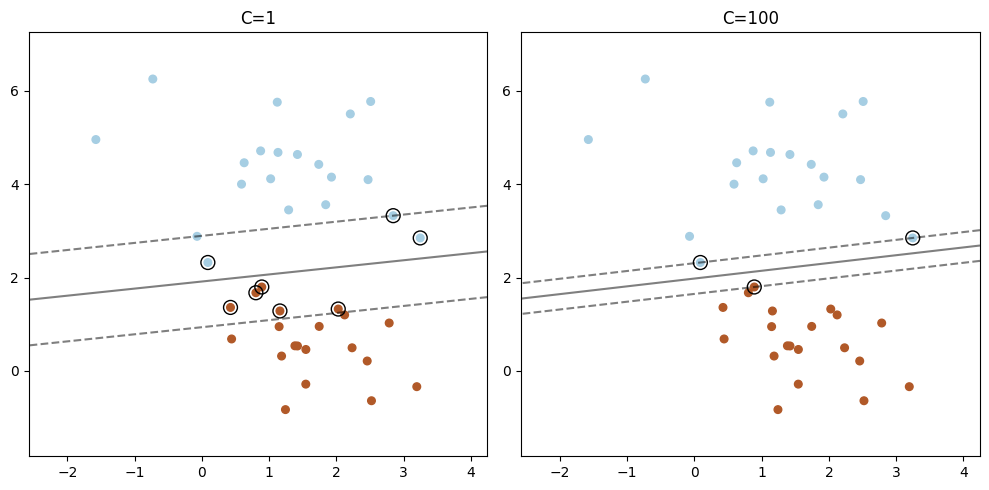

In [21]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42, dual="auto").fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

**Note: The C hyperparameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.**